# Predicting Car Prices Using Machine Learning
In this notebook we will be predicting a car's market price using its attributes using a simple machine learning workflow. 

For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. We will use these attributes to create a model that can give a good idea of a cars market value given only the attributes of a car it hasn't seen before.

## Data
The data we will be using the train the model can be found on the University of California Irvine's machine learning reposity [here](https://archive.ics.uci.edu/ml/datasets/automobile)

The data have the following columns:
1. **symboling**: -3, -2, -1, 0, 1, 2, 3. 
2. **normalized-losses**: continuous from 65 to 256. 
3. **make**: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo 
4. **fuel-type**: diesel, gas. 
5. **aspiration**: std, turbo. 
6. **num-of-doors**: four, two. 
7. **body-style**: hardtop, wagon, sedan, hatchback, convertible. 
8. **drive-wheels**: 4wd, fwd, rwd. 
9. **engine-location**: front, rear. 
10. **wheel-base**: continuous from 86.6 120.9. 
11. **length**: continuous from 141.1 to 208.1. 
12. **width**: continuous from 60.3 to 72.3. 
13. **height**: continuous from 47.8 to 59.8. 
14. **curb-weight**: continuous from 1488 to 4066. 
15. **engine-type**: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. **num-of-cylinders**: eight, five, four, six, three, twelve, two. 
17. **engine-size**: continuous from 61 to 326. 
18. **fuel-system**: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. **bore**: continuous from 2.54 to 3.94. 
20. **stroke**: continuous from 2.07 to 4.17. 
21. **compression-ratio**: continuous from 7 to 23. 
22. **horsepower**: continuous from 48 to 288. 
23. **peak-rpm**: continuous from 4150 to 6600. 
24. **city-mpg**: continuous from 13 to 49. 
25. **highway-mpg**: continuous from 16 to 54. 
26. **price**: continuous from 5118 to 45400.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

pd.set_option('display.max_columns', 500)

cars = pd.read_csv('imports-85.data')
cars.head(3)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


It looks like the column names are a copy from the first row, let's clean them up to match the documentation.

In [2]:
col_names = ['symboling', 
             'normalized-losses', 
             'make', 
             'fuel-type', 
             'aspiration', 
             'num-of-doors', 
             'body-style', 
             'drive-wheels', 
             'engine-location', 
             'wheel-base', 
             'length', 
             'width', 
             'height', 
             'curb-weight', 
             'engine-type', 
             'num-of-cylinders', 
             'engine-size', 
             'fuel-system', 
             'bore', 
             'stroke', 
             'compression-rate', 
             'horsepower', 
             'peak-rpm', 
             'city-mpg', 
             'highway-mpg', 
             'price']
cars.columns = col_names
cars.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


## Data Cleaning
Looking at a few rows of the dataset, we can see that several columns contain `?` to represent missing data. Let's replace these values with `NaN`.

In [3]:
cars = cars.replace('?', np.nan)
cars['normalized-losses'].head(3)

0    NaN
1    NaN
2    164
Name: normalized-losses, dtype: object

Now let's rescale the values in the numeric columns from 0 to 1 to prevent the predictive model from assigning undue weight to columns with higher magnitude values.

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
symboling            204 non-null int64
normalized-losses    164 non-null object
make                 204 non-null object
fuel-type            204 non-null object
aspiration           204 non-null object
num-of-doors         202 non-null object
body-style           204 non-null object
drive-wheels         204 non-null object
engine-location      204 non-null object
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null int64
engine-type          204 non-null object
num-of-cylinders     204 non-null object
engine-size          204 non-null int64
fuel-system          204 non-null object
bore                 200 non-null object
stroke               200 non-null object
compression-rate     204 non-null float64
horsepower           202 non-nul

The columns `normalized-losses`, `bore`, `stroke`, `horsepower`, `peak-rpm`, and `price` are all of type object but contain numeric data, so let's convert these columns to the appropriate datatype first. 

First, `num-of-cylinders` is written in longhand numbers ('four', 'six', etc.), we can convert these to digits and then to the integer datatype along with the other columns.

In [5]:
cars['num-of-cylinders'].value_counts()

four      158
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [6]:
str_num_dict = {'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}
cars['num-of-cylinders'] = cars['num-of-cylinders'].replace(str_num_dict)
cars['num-of-cylinders'].value_counts()

4     158
6      24
5      11
8       5
2       4
12      1
3       1
Name: num-of-cylinders, dtype: int64

In [7]:
to_num_cols = ['normalized-losses', 'horsepower', 'peak-rpm', 'num-of-cylinders', 'price', 'bore', 'stroke']

cars[to_num_cols] = cars[to_num_cols].apply(pd.to_numeric)
cars[to_num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 7 columns):
normalized-losses    164 non-null float64
horsepower           202 non-null float64
peak-rpm             202 non-null float64
num-of-cylinders     204 non-null int64
price                200 non-null float64
bore                 200 non-null float64
stroke               200 non-null float64
dtypes: float64(6), int64(1)
memory usage: 11.2 KB


Before normalizing these columns, let's handle the null values.

Because the `price` column is the column we want to predict, let's remove rows with missing `price` values.

In [8]:
num_cols = cars.select_dtypes(include=['int', 'float']).columns

# Drop rows with null price values
cars = cars.dropna(subset=['price'])

cars[num_cols].isnull().sum()

symboling             0
normalized-losses    36
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
num-of-cylinders      0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

For the other numeric columns, let's simply replace the `NaN` values with the mean of the respective column.

In [9]:
cars[num_cols] = cars[num_cols].fillna(cars.mean(axis=0))

cars[num_cols].isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
num-of-cylinders     0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
# Normalize values to between 0 and 1 except the target column
price = cars['price']
cars[num_cols] = (cars[num_cols] - cars[num_cols].min()) / \
                    (cars[num_cols].max() - cars[num_cols].min())
cars['price'] = price

## Simple Model
Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure our code workflow and understand the features better.

We'll start with training the model on only one feature at a time with different K values.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

def knn_train_test(train_cols, target_col, df, k=5):
    # Split data into train and test sets
    train, test = train_test_split(df, test_size=.8, random_state=1)
    
    # Train model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train[train_cols], train[target_col])
    
    # Calculate RMSE on test set
    predictions = knn.predict(test[train_cols])
    rmse = np.sqrt(mean_squared_error(predictions, test[target_col]))
    
    return rmse
    
# Run model on each feature with different k values
k_rmse_results = {}
features = cars[num_cols].drop('price', axis=1).columns
for col in features:
    k_rmses = {}
    for k in np.arange(1, 10, 2):
        k_rmses[k] = knn_train_test([col], 'price', cars, k)

    k_rmse_results[col] = k_rmses

k_rmse_results

{'symboling': {1: 0.22265906118921178,
  3: 0.2135054821492792,
  5: 0.20438605304290466,
  7: 0.2064636954670917,
  9: 0.20661679963886181},
 'normalized-losses': {1: 0.22352842749373245,
  3: 0.1996011132698086,
  5: 0.20133447010067368,
  7: 0.20470035148852075,
  9: 0.20950990599055688},
 'wheel-base': {1: 0.1879393740865287,
  3: 0.18190728972386452,
  5: 0.16976826293298583,
  7: 0.17300669488021347,
  9: 0.17922308699363185},
 'length': {1: 0.18944973268808812,
  3: 0.16139110368883217,
  5: 0.1541092811417694,
  7: 0.16801870165318586,
  9: 0.15954525388117585},
 'width': {1: 0.14194269334728676,
  3: 0.1318546403245603,
  5: 0.14187602167136276,
  7: 0.14809192553364736,
  9: 0.15289671370177543},
 'height': {1: 0.20733971203945106,
  3: 0.20477246305028146,
  5: 0.1959108739513117,
  7: 0.19941727260191888,
  9: 0.20355595784314073},
 'curb-weight': {1: 0.10555319216859316,
  3: 0.12172064079557295,
  5: 0.12376777356527967,
  7: 0.12988179550521178,
  9: 0.13795765560988005}

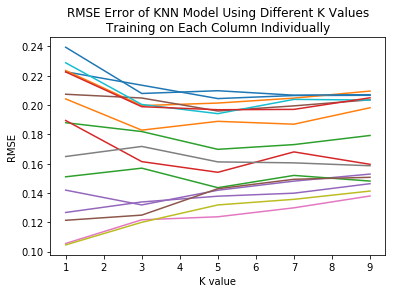

In [12]:
for k, v in k_rmse_results.items():
    plt.plot(v.keys(), v.values())
    plt.xlabel('K value')
    plt.ylabel('RMSE')
plt.title('RMSE Error of KNN Model Using Different K Values\nTraining on Each Column Individually')
plt.show()

## Training on Multiple Features
Now that we've trained a KNN model on each feature individually, let's try using more features and see how that affects the results.

In [20]:
all_features_rmse = {}
for feature in features:
    rmse = knn_train_test([feature], 'price', cars)
    all_features_rmse[feature] = rmse
    
# Train a model using the features from the previous run with the lowest rmse
rmse_n_features = {}
for i in range(2, 6):
    top_i_features = sorted(all_features_rmse, key=all_features_rmse.get)[:i]
    print(i, top_i_features)
    rmse = knn_train_test(top_i_features, 'price', cars)
    rmse_n_features[i] = rmse
    
rmse_n_features

2 ['curb-weight', 'engine-size']
3 ['curb-weight', 'engine-size', 'city-mpg']
4 ['curb-weight', 'engine-size', 'city-mpg', 'width']
5 ['curb-weight', 'engine-size', 'city-mpg', 'width', 'highway-mpg']


{2: 0.12629906551201206,
 3: 0.12584365685986368,
 4: 0.11921256433203234,
 5: 0.11976087603474675}